# How much does functional dependents contribute to the overall LAS?

We are interested in looking at

In [1]:
# Matplotlib
%matplotlib inline
import matplotlib
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 7.0)
matplotlib.style.use('ggplot')

# Remove warnings
import warnings
#warnings.filterwarnings('ignore')

import sys, os
from os.path import join
sys.path.append("../tools/")
from collections import defaultdict

# Data management libraries
import pandas as pd
import seaborn as sns

# Treebank utils, found in "../tools"
import udeval, udtree, lang_utils, dependency_classes

is_labeled = True
is_fine_grained_deprels = True
file_format = "conllx"
test_type = "test"

system_output_base = "/Users/jimmy/dev/edu/nlp-rod/udeval/resources/maltdefault_output_dev/"
gold_output_base = "/Users/jimmy/dev/edu/nlp-rod/udeval/resources/universaldependencies1-1/ud-treebanks-v1.1/"
file_prefix = "maltdefault"

system_files = lang_utils.get_system_output_paths(system_output_base, type_=test_type, format_=file_format)
gold_files = lang_utils.get_ud_paths(gold_output_base, type_=test_type, format_=file_format)

/Users/jimmy/dev/miniconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
las_scores = pd.Series.from_csv('../data/' + file_prefix + '.las.csv')
content_function_las = pd.DataFrame.from_csv('../data/' + file_prefix + '.content_function_deprels.las.csv', header=[0,1])
content_function_las

Content           Nonsemantic            Function          
            precision    recall   precision    recall precision    recall
Basque       0.592469  0.592469    0.638022  0.638022  0.804422  0.804422
Bulgarian    0.777082  0.777082    0.814063  0.814063  0.922995  0.922995
Croatian     0.737683  0.737683    0.716828  0.716828  0.829309  0.829309
Czech        0.792717  0.792717    0.706682  0.706682  0.886119  0.886119
Danish       0.780969  0.780969    0.627820  0.627820  0.876844  0.876844
English      0.805206  0.805206    0.762743  0.762743  0.921563  0.921563
Finnish      0.606343  0.606343    0.732759  0.732759  0.751449  0.751449
Finnish-FTB  0.752727  0.752727    0.919694  0.919694  0.812558  0.812558
French       0.774535  0.774535    0.629508  0.629508  0.921006  0.921006
German       0.702180  0.702180    0.688225  0.688225  0.886181  0.886181
Greek        0.688571  0.688571    0.549844  0.549844  0.892642  0.892642
Hebrew       0.689011  0.689011    0.627503  0.627503  0.890490  0.890490
Hungarian    0.554661  0.554661    0.622222  0.622222  0.870968  0.870968
Indonesian   0.730014  0.730014    0.636588  0.636588  0.853874  0.853874
Irish        0.605330  0.605330    0.763533  0.763533  0.880713  0.880713
Italian      0.772619  0.772619    0.741065  0.741065  0.958186  0.958186
Persian      0.740325  0.740325    0.776618  0.776618  0.884832  0.884832
Spanish      0.752576  0.752576    0.671259  0.671259  0.927029  0.927029
Swedish      0.704818  0.704818    0.622015  0.622015  0.814203  0.814203

In [3]:
from collections import defaultdict

def label_ratio(trees, label_class):
    deprel_freqs = 0
    total_deprels = 0
    for tree in trees:
        for deprel in tree.deprels:
            label = deprel.split(":")[0]
            total_deprels += 1
            if label in label_class:
                deprel_freqs += 1
    deprel_dist = deprel_freqs / total_deprels
    return deprel_dist

def language_deprel_ratio(treebank_paths, label_class):
    lang_deprels = {}
    for lang, path in treebank_paths.items():
        lang_deprels[lang] = label_ratio(udtree.from_files(path), label_class)
    return lang_deprels

lang_function_rels = pd.Series(language_deprel_ratio(gold_files, dependency_classes.function_dependents)).fillna(0)
lang_function_rels.to_csv('../data/' + file_prefix + '.function_dist.csv')
lang_function_rels

Basque         0.197226
Bulgarian      0.289149
Croatian       0.233697
Czech          0.207475
Danish         0.251538
English        0.287297
Finnish        0.147593
Finnish-FTB    0.169456
French         0.385506
German         0.337889
Greek          0.356034
Hebrew         0.350515
Hungarian      0.211009
Indonesian     0.200255
Irish          0.328971
Italian        0.412880
Persian        0.277431
Spanish        0.397593
Swedish        0.325858
dtype: float64

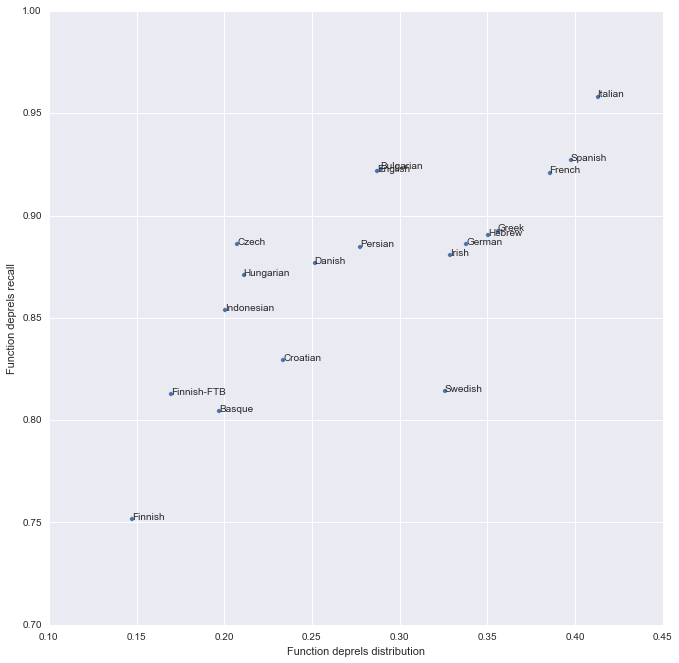

In [4]:
function_precision = pd.concat([lang_function_rels, content_function_las['Function']['recall']], axis=1)
function_precision.columns = ['Function deprels distribution', 'Function deprels recall']
ax = function_precision.plot(kind='scatter', x='Function deprels distribution', y='Function deprels recall', figsize=(11,11))
for lang, x, y in function_precision.itertuples():
    ax.annotate(lang, (x, y))

In [5]:
core_las = pd.DataFrame.from_csv('../data/maltdefault.ud_classes.las.csv', header=[0,1])['core']['precision']
core_ratio = pd.Series(language_deprel_ratio(gold_files, dependency_classes.core_dependents))
core_las_ratio = pd.concat([core_las, core_ratio], axis=1)
core_las_ratio.columns = ['Core deprels recall', 'Core deprels ratio']

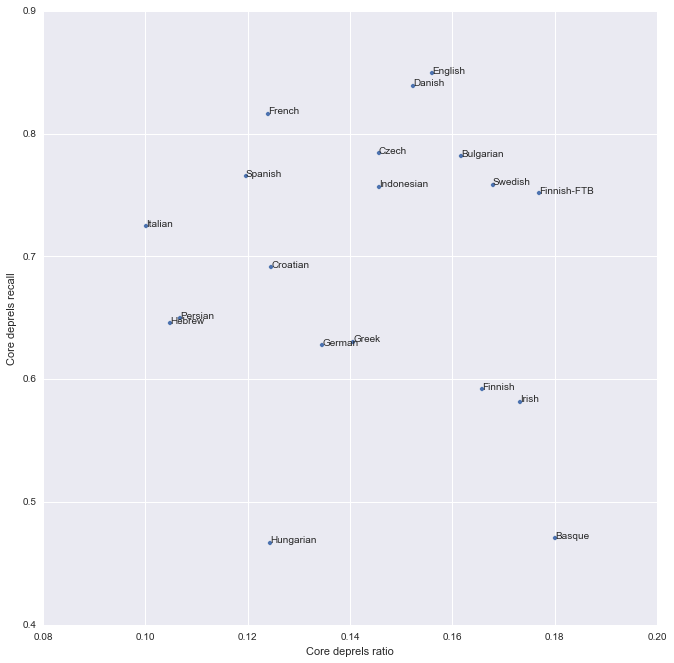

In [6]:
ax = core_las_ratio.plot(kind='scatter', x='Core deprels ratio', y='Core deprels recall', figsize=(11,11))
for lang, x, y in core_las_ratio.itertuples():
    ax.annotate(lang, (y, x))

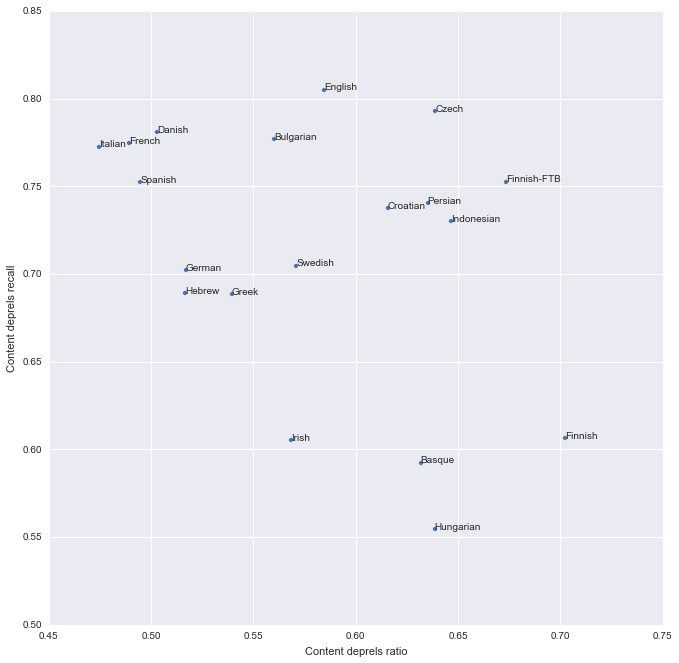

In [7]:
lang_content_rels = pd.Series(language_deprel_ratio(gold_files, dependency_classes.content_dependents)).fillna(0)
lang_content_rels.to_csv('../data/' + file_prefix + '.content_dist.csv')
content_precision = pd.concat([lang_content_rels, content_function_las['Content']['recall']], axis=1)
content_precision.columns = ['Content deprels ratio', 'Content deprels recall']
ax = content_precision.plot(kind='scatter', x='Content deprels ratio', y='Content deprels recall', figsize=(11,11))
for lang, x, y in content_precision.itertuples():
    ax.annotate(lang, (x, y))